# Questions 1 and 2

In [1]:
# imports
import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics

from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#reading zip code data and joining borough name
ny = pd.read_csv('output/ny_final.csv')
ny.head()

,GEOID_ZIP,ALAND10,AWATER10,tot_pop,white,per_white,black,per_black,native,per_native,...,sub_region_2,retail_and_recreation_percent_change_from_baseline_sum,grocery_and_pharmacy_percent_change_from_baseline_sum,parks_percent_change_from_baseline_sum,transit_stations_percent_change_from_baseline_sum,workplaces_percent_change_from_baseline_sum,residential_percent_change_from_baseline_sum,pop_density,per_infected,change_in_bed
0,10065,984654,0,28109,24285,86.4,619,2.2,37,0.1,...,Manhattan,-2296,-1006,-1544,-2199,-1926,777,0.028547,0.008289,368
1,10069,249050,0,5085,3155,62.0,148,2.9,0,0.0,...,Manhattan,-2296,-1006,-1544,-2199,-1926,777,0.020418,0.007866,0
2,10075,477137,0,21556,18396,85.3,677,3.1,225,1.0,...,Manhattan,-2296,-1006,-1544,-2199,-1926,777,0.045178,0.013639,156
3,10128,1206191,0,59256,47167,79.6,2182,3.7,0,0.0,...,Manhattan,-2296,-1006,-1544,-2199,-1926,777,0.049127,0.007763,297
4,10280,297253,38409,9384,7360,78.4,184,2.0,0,0.0,...,Manhattan,-2296,-1006,-1544,-2199,-1926,777,0.031569,0.003410,9


## a) which variables go together (factor analysis)

**Visualization**

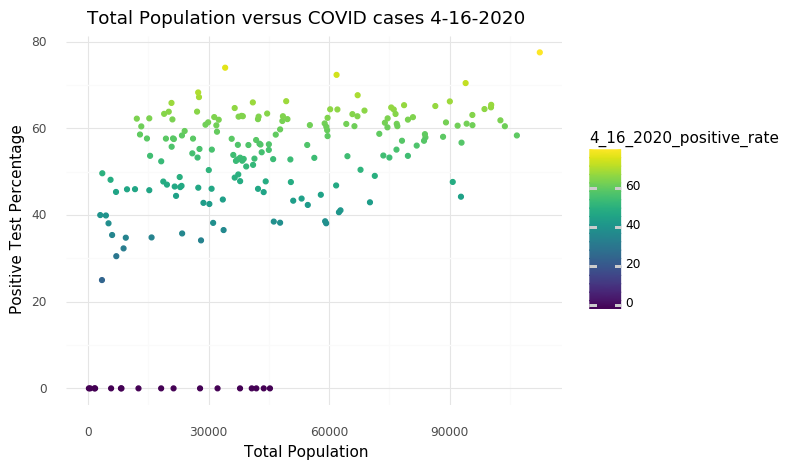

<ggplot: (281832405)>

In [3]:
(ggplot(ny, aes(x='tot_pop', y='4_16_2020_positive_rate', color= '4_16_2020_positive_rate'))+ geom_point()+theme_minimal()+ ggtitle("Total Population versus COVID cases 4-16-2020")+ xlab("Total Population")+ylab("Positive Test Percentage"))

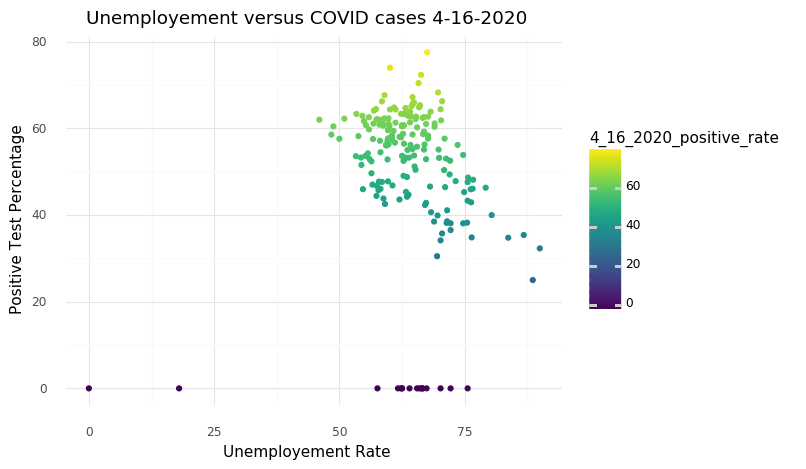

<ggplot: (7555308669)>

In [4]:
(ggplot(ny, aes(x='unemployment_rate', y='4_16_2020_positive_rate', color= '4_16_2020_positive_rate'))+ geom_point()+theme_minimal()+ ggtitle("Unemployement versus COVID cases 4-16-2020")+ xlab("Unemployement Rate")+ylab("Positive Test Percentage"))

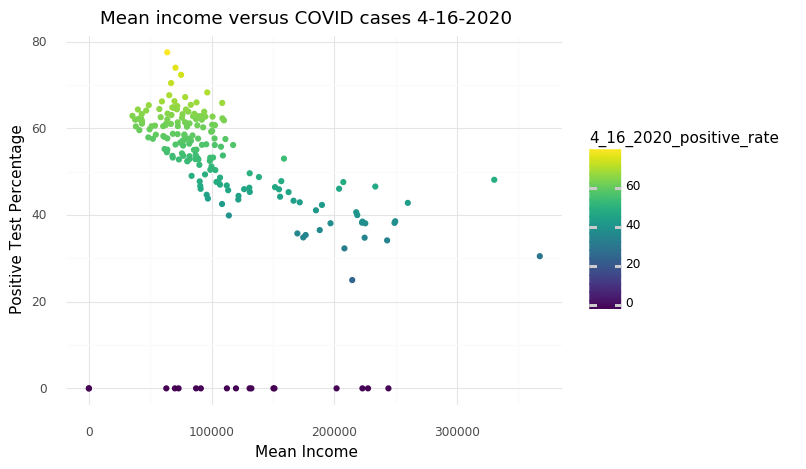

<ggplot: (7555328717)>

In [5]:
(ggplot(ny, aes(x='mean_incom', y='4_16_2020_positive_rate', color= '4_16_2020_positive_rate'))+ geom_point()+theme_minimal()+ ggtitle("Mean income versus COVID cases 4-16-2020")+ xlab("Mean Income")+ylab("Positive Test Percentage"))

**Factoring and minimizing to socio-economic variables**

In [6]:
#creating a subset of the ny dataframe containing socio-economic variables
df = ny[['tot_pop','disabled', 'per_disabled', 'unemployment_rate','tot_households_snap','households_snap','per_households_snap','tot_pop_mobility','less_10k','10k_15k','15k_25k','25k_35k','35k_50k','50k_75k','75k_100k','100k_150k','150k_200k','more_200k','med_income','mean_incom','non_citizen','pop_pov','pop_below_','pcnt_pov','families_on_suplimental_income','families_on_social_security','insured','per_insured','uninsured','per_uninsured','owner','rent', '4_16_2020_positive_rate']].copy()

features = ['tot_pop','disabled', 'per_disabled', 'unemployment_rate','tot_households_snap','households_snap','per_households_snap','tot_pop_mobility','less_10k','10k_15k','15k_25k','25k_35k','35k_50k','50k_75k','75k_100k','100k_150k','150k_200k','more_200k','med_income','mean_incom','non_citizen','pop_pov','pop_below_','pcnt_pov','families_on_suplimental_income','families_on_social_security','insured','per_insured','uninsured','per_uninsured','owner','rent']

In [7]:
#standardize variables
zScore = StandardScaler() #standardize variables makes them easier with the math
zScore.fit(df[features])
df[features] = zScore.transform(df[features])

In [8]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors = 5, rotation=None)
fa.fit(df[features])

loadings = fa.loadings_

# Check Eigenvalues
ev, v =  fa.get_eigenvalues()

#create dataframe with relations between factors and variables
meaning = pd.DataFrame(loadings, columns = ['factor1', 'factor2','factor3','factor4','factor5'], index=features)
meaning

,factor1,factor2,factor3,factor4,factor5
tot_pop,0.836267,0.543765,0.031111,-0.023744,-0.044915
disabled,0.898024,0.256774,0.132348,0.159859,-0.089742
per_disabled,0.374822,-0.369962,-0.051127,0.396301,-0.167317
unemployment_rate,-0.319211,0.396844,0.212329,-0.059144,0.589986
tot_households_snap,0.732409,0.588941,0.184262,0.044988,-0.071236
households_snap,0.912059,-0.014669,0.280308,0.059714,0.045686
per_households_snap,0.830969,-0.394368,0.150628,0.123576,0.133156
tot_pop_mobility,0.835847,0.544910,0.029210,-0.023882,-0.045705
less_10k,0.680071,-0.368770,0.312668,0.136480,0.094291
10k_15k,0.740718,-0.421340,0.200697,0.284955,0.005535


In [9]:
# get the column name of max values in every row
maxValueIndexObj = meaning.idxmax(axis=1)
 
print("Max values of row are at following columns :")
print(maxValueIndexObj)

Max values of row are at following columns :
tot_pop                           factor1
disabled                          factor1
per_disabled                      factor4
unemployment_rate                 factor5
tot_households_snap               factor1
households_snap                   factor1
per_households_snap               factor1
tot_pop_mobility                  factor1
less_10k                          factor1
10k_15k                           factor1
15k_25k                           factor1
25k_35k                           factor1
35k_50k                           factor1
50k_75k                           factor1
75k_100k                          factor2
100k_150k                         factor2
150k_200k                         factor2
more_200k                         factor3
med_income                        factor2
mean_incom                        factor3
non_citizen                       factor1
pop_pov                           factor1
pop_below_                     

From this analysis we can see the breakdown of each of the 5 factors and what the variables are that correspond to each. Factor 1 encompasses total population, disabled, total households snap, total population mobility, non_citizen, population in poverty, families on social security, insured, owner, and rent. Factor 2 encompasses primarily percent disabled, households snap, percent households snap, less than 10k, between 10k and 15k, between 12k and 25k, between 25k and 305k. Factor 3 is smaller than the others being primarily comprised of number of people between 35k and 50k, 50k and 75k, and 75k and 100k. Factor 4 is comprised of the higher incomes and mean and median incomes. Strangely, factor 5 is the highest value for only one variable and that is per_uninsured. 

## b) which of these factors predict COVID cases

In [10]:
xvals = range(1,df[features].shape[1]+1)

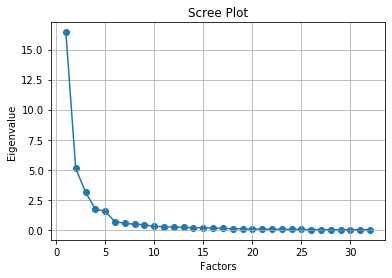

In [11]:
# Create scree plot using matplotlib
plt.scatter(xvals,ev)
plt.plot(xvals,ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [12]:
variance = fa.get_factor_variance()

vDF = pd.DataFrame(variance, columns = ['factor1', 'factor2','factor3','factor4','factor5'], index= ["SS Loadings", "Proportion Var", "Cumulative Var"])
vDF

,factor1,factor2,factor3,factor4,factor5
SS Loadings,16.310404,4.993170,2.925724,1.532068,1.315206
Proportion Var,0.509700,0.156037,0.091429,0.047877,0.041100
Cumulative Var,0.509700,0.665737,0.757166,0.805043,0.846143


In [13]:
X = df[features]
y = df["4_16_2020_positive_rate"]

In [14]:
model1 = LinearRegression()
model1.fit(X, y)
print("all data without train/test: ", model1.score(X, y))

all data without train/test:  0.5319451640160224


In [15]:
#kfold split
kf = KFold(n_splits = 5)
model2 = LinearRegression()
scores = []

for train, test in kf.split(X,y):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y[train]
    y_test = y[test]
    
    model2.fit(X_train,y_train)
    scores.append(model2.score(X_test,y_test))
    covid_pred = model2.predict(X_test)
    
print(scores)
print("mean all data score: ", np.mean(scores))

[-1.1439417235238465, 0.5767110159411937, -0.050248788580046666, -2.864607537089706, -0.17382609197548504]
mean all data score:  -0.7311826250455781


In [16]:
true_v_pred= pd.DataFrame({"predict": covid_pred, "trueV": y_test})

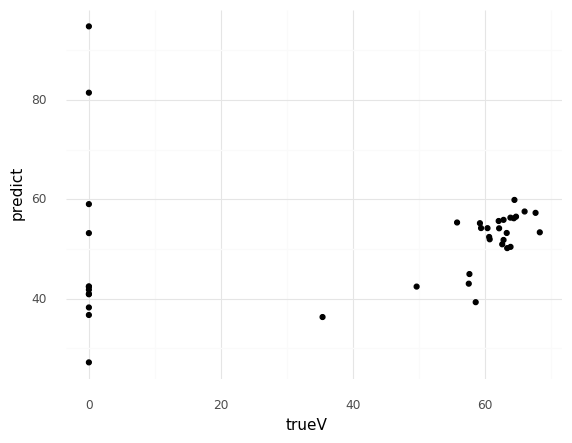

<ggplot: (7556382069)>

In [17]:
ggplot(true_v_pred, aes(x = "trueV", y = "predict")) +geom_point() +theme_minimal()

### Model performed with factors

In [18]:
fact = fa.transform(df[features])
fact = pd.DataFrame(fact)

model3 = LinearRegression()
model3.fit(fact, df["4_16_2020_positive_rate"])
print("5 factors: ", model3.score(fact, df["4_16_2020_positive_rate"]))

5 factors:  0.3976590568093542


In [19]:
X = fact
y = df["4_16_2020_positive_rate"]

#kfold split
kf = KFold(n_splits = 5)
model4 = LinearRegression()
scores = []

for train, test in kf.split(X,y):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y[train]
    y_test = y[test]
    
    model4.fit(X_train,y_train)
    scores.append(model4.score(X_test,y_test))
    covid_pred = model4.predict(X_test)
    
print(scores)
print("mean all data score: ", np.mean(scores))

[-0.972474104610733, 0.6488316795838845, 0.1366405534642332, -1.0089241730677982, 0.10476477945773888]
mean all data score:  -0.21823225303453495


In [20]:
true_v_pred = pd.DataFrame({"predict": covid_pred, "trueV": y_test})

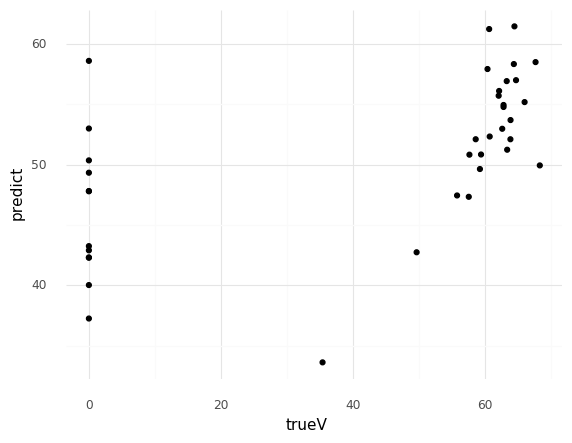

<ggplot: (7556388181)>

In [21]:
ggplot(true_v_pred, aes(x = "trueV", y = "predict")) +geom_point() +theme_minimal()

The model with all 33 socio-economic variables fit with a linear model did not predict the number of COVID cases on 4/16/2020 that well. Without a train - test split it had an r2 score of roughly 0.5. We can see that the model was fitting to noise however because when a fit was performed using a train test split the model had a negative r2 score. This can happen if the regression line that the model predicts is worse than simply using the mean value, which is why r squared values are usually non-negative. 

The model with the 5 factored variables did not predict the COVID cases to any level os significance with an r2 score of 0.39 without using a kfold train test split. With a train test split the model had a score of -0.21.

From this analysis we know that there is some relationship between socio-economic variables and the number of COVID cases however, our model simply did not contain enough information to create an effective predictive model of COVID cases. 

We can see this visually from looking at the graphs from the last test split of predicted values versus true values. We would hope to see a clear diagonal line but see a large scattering of data points instead.

